# Implementing Activation Functions

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as mpl
import seaborn as sns

sess = tf.InteractiveSession()

In [2]:
a = tf.constant([1.2, 4.8, 7.5, -1.4, 0.1, -3.7, 8.3, -2.2])

In [3]:
def plotFn(fns, xRange=(-9., 9.), nx=250, title=''):
    %matplotlib notebook
    x = tf.linspace(start=xRange[0], stop=xRange[1], num=nx)
    mpl.figure(figsize=(7, 5))
    
    if not type(fns) is list:
        fns = [fns]
        
    for fn in fns:
        y = fn(x)
        mpl.plot(sess.run(x), sess.run(y), ':', linewidth=1.5)
        
    mpl.xlabel('x')
    mpl.ylabel('y')
    mpl.title(title)
    mpl.legend([fn.__name__ for fn in fns])
    mpl.show()

### Rectified Linear Unit (ReLU)

In [4]:
sess.run(tf.nn.relu(features=a))

array([ 1.20000005,  4.80000019,  7.5       ,  0.        ,  0.1       ,
        0.        ,  8.30000019,  0.        ], dtype=float32)

In [5]:
sess.run(tf.maximum(a, 0))

array([ 1.20000005,  4.80000019,  7.5       ,  0.        ,  0.1       ,
        0.        ,  8.30000019,  0.        ], dtype=float32)

<IPython.core.display.Javascript object>


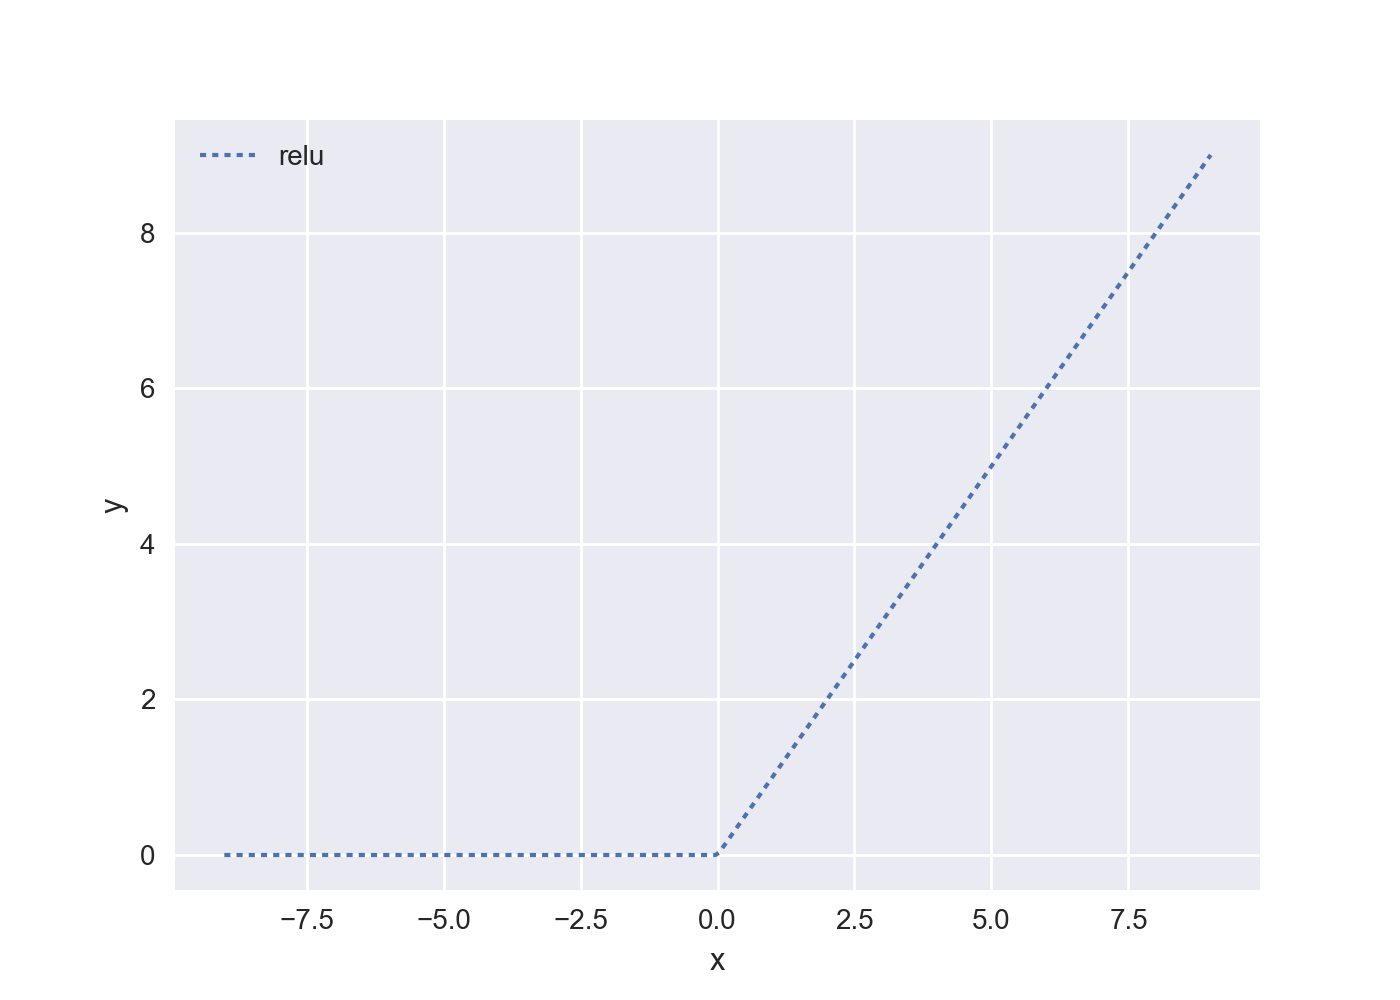

In [6]:
plotFn(tf.nn.relu)

### ReLU6

In [7]:
sess.run(tf.nn.relu6(features=a))

array([ 1.20000005,  4.80000019,  6.        ,  0.        ,  0.1       ,
        0.        ,  6.        ,  0.        ], dtype=float32)

In [8]:
sess.run(tf.minimum(tf.maximum(a, 0), 6))

array([ 1.20000005,  4.80000019,  6.        ,  0.        ,  0.1       ,
        0.        ,  6.        ,  0.        ], dtype=float32)

<IPython.core.display.Javascript object>


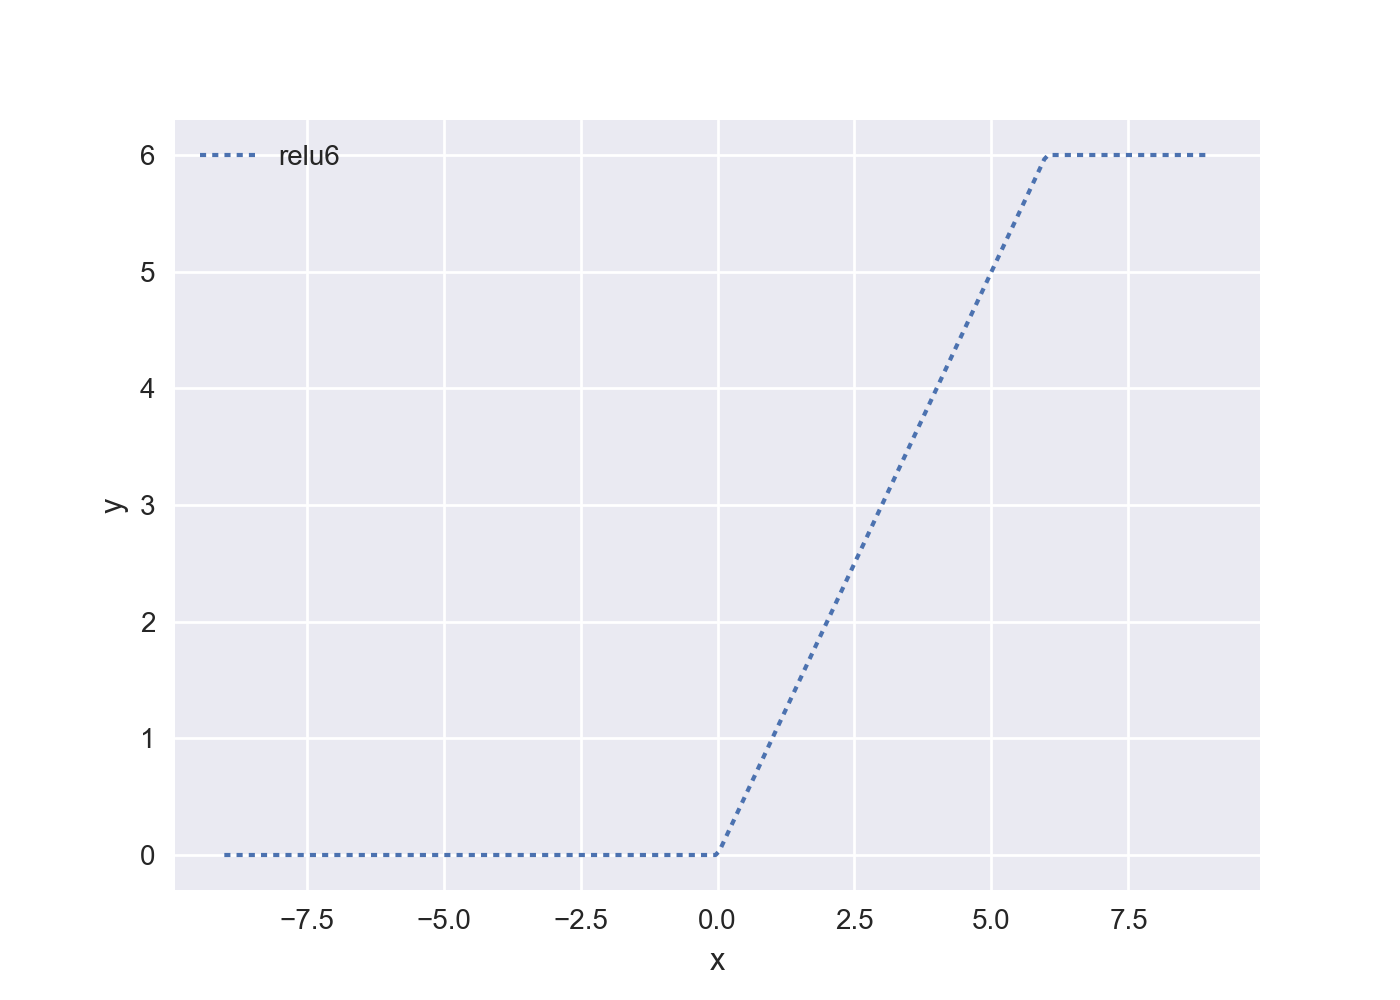

In [9]:
plotFn(tf.nn.relu6)

### Sigmoid Function

In [10]:
sess.run(tf.nn.sigmoid(x=a))

array([ 0.76852483,  0.99183744,  0.99944717,  0.1978161 ,  0.52497917,
        0.02412702,  0.99975151,  0.09975048], dtype=float32)

In [11]:
sess.run(1 / (1 + tf.exp(tf.negative(a))))

array([ 0.76852483,  0.99183744,  0.99944717,  0.1978161 ,  0.52497917,
        0.02412702,  0.99975151,  0.09975048], dtype=float32)

<IPython.core.display.Javascript object>


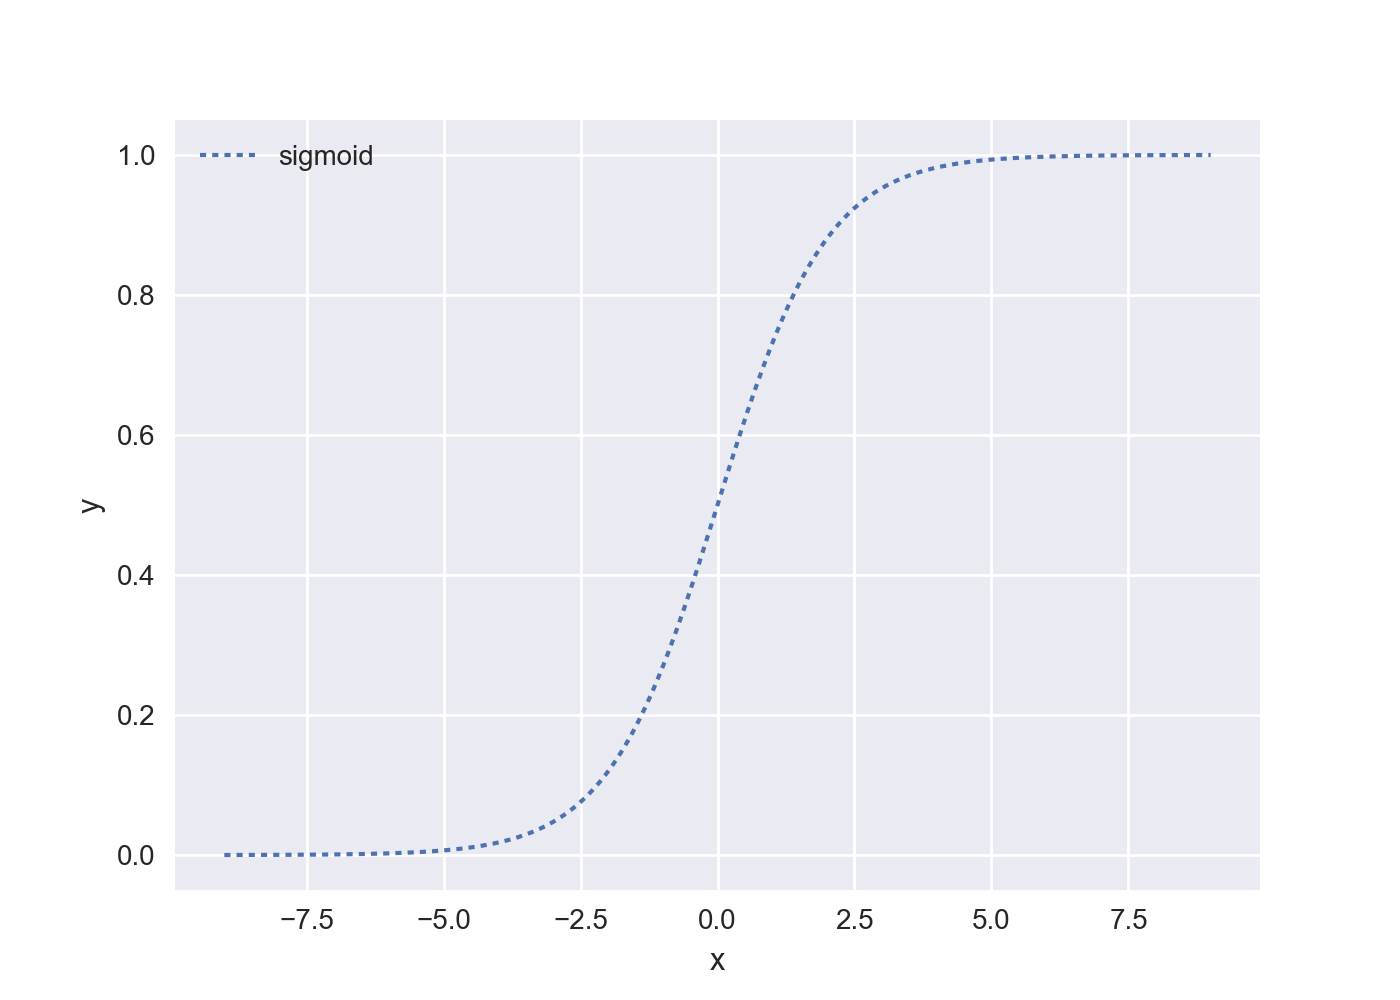

In [12]:
plotFn(tf.nn.sigmoid)

### Hyperbolic Tangent

In [14]:
sess.run(tf.nn.tanh(x=a))

array([ 0.8336547 ,  0.99986452,  0.9999994 , -0.88535166,  0.09966799,
       -0.99877834,  0.99999988, -0.97574323], dtype=float32)

In [15]:
sess.run((tf.exp(a) - tf.exp(-a)) / (tf.exp(a) + tf.exp(-a)))

array([ 0.83365464,  0.99986452,  0.99999934, -0.88535166,  0.09966801,
       -0.99877828,  0.99999988, -0.97574306], dtype=float32)

<IPython.core.display.Javascript object>


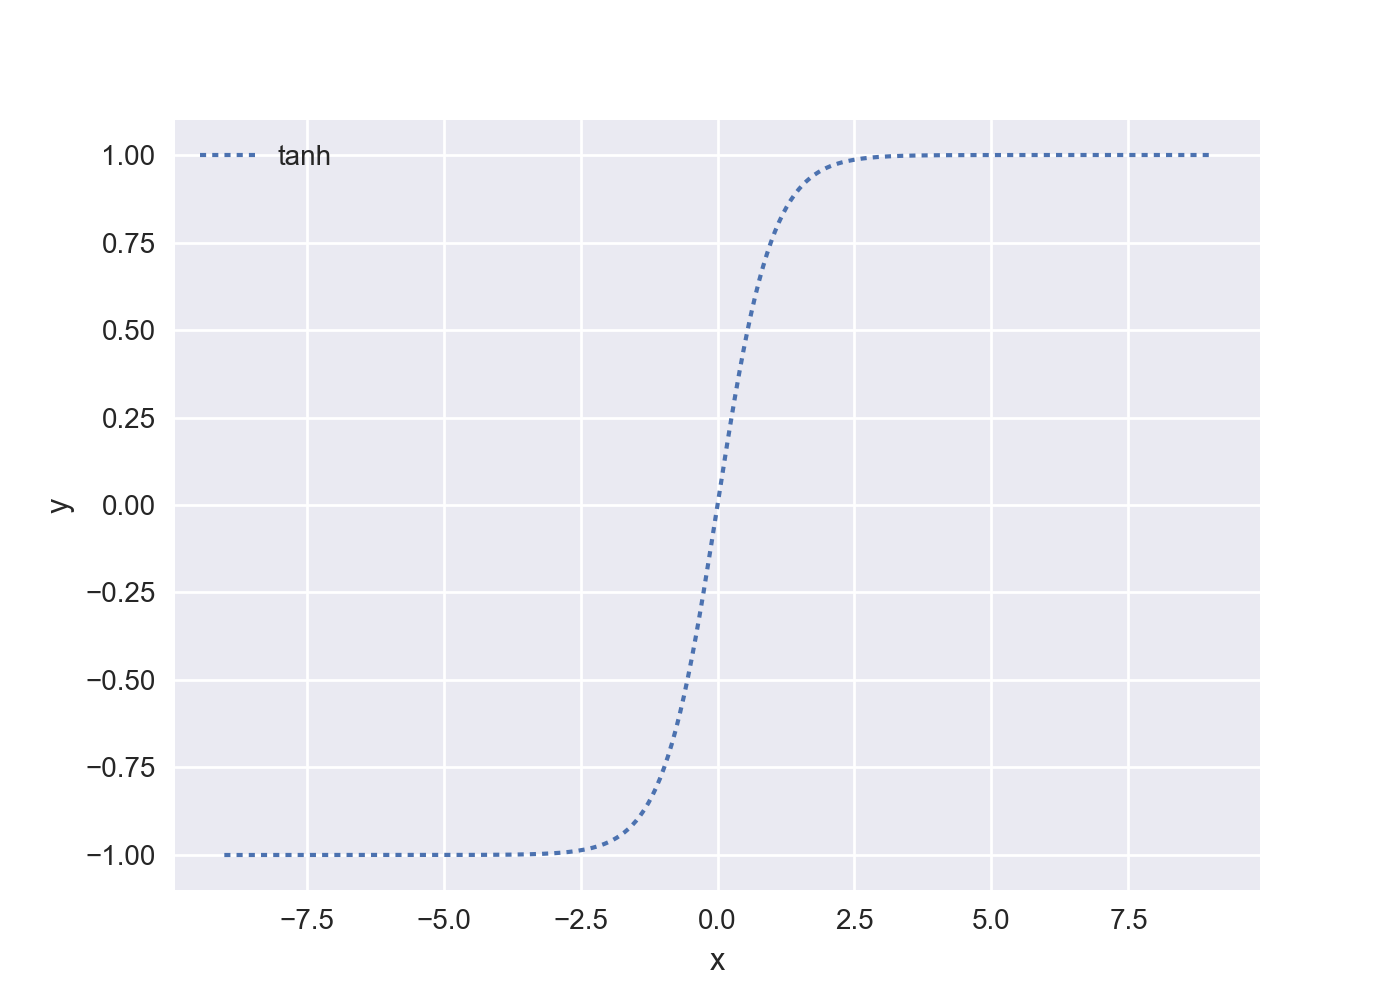

In [16]:
plotFn(tf.nn.tanh)

### Softsign

In [17]:
sess.run(tf.nn.softsign(features=a))

array([ 0.54545456,  0.82758623,  0.88235295, -0.58333331,  0.09090909,
       -0.78723407,  0.8924731 , -0.6875    ], dtype=float32)

In [18]:
sess.run(a / (tf.abs(a) + 1))

array([ 0.54545456,  0.82758623,  0.88235295, -0.58333331,  0.09090909,
       -0.78723407,  0.8924731 , -0.6875    ], dtype=float32)

<IPython.core.display.Javascript object>


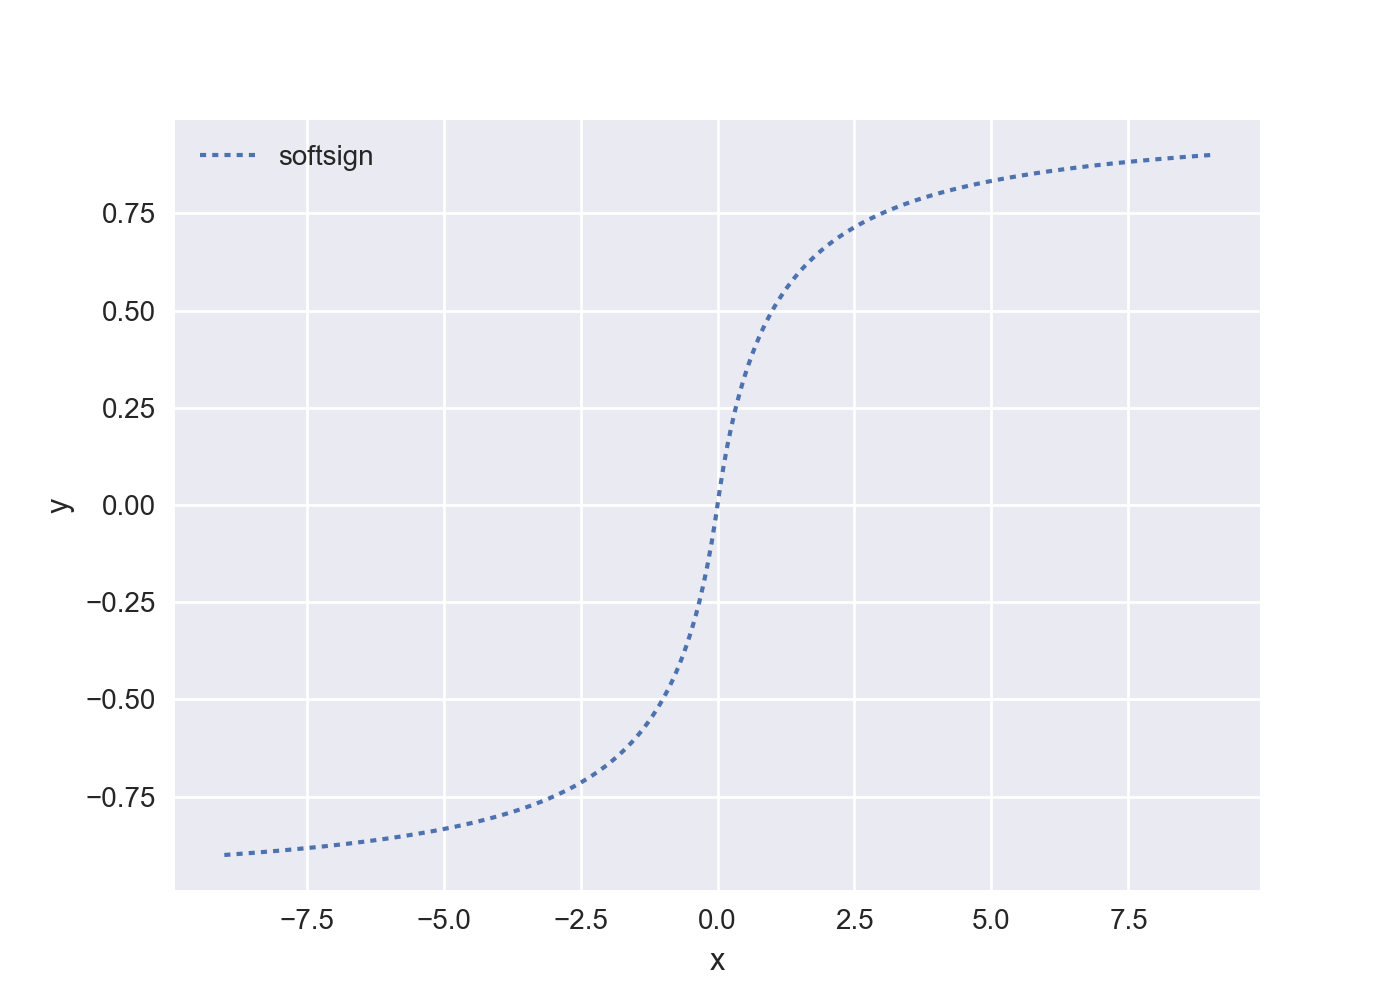

In [19]:
plotFn(tf.nn.softsign)

### Softplus

In [20]:
sess.run(tf.nn.softplus(features=a))

array([ 1.46328247,  4.80819607,  7.50055313,  0.22041738,  0.74439669,
        0.02442285,  8.3002491 ,  0.10508329], dtype=float32)

In [21]:
sess.run(tf.log(tf.exp(a) + 1))

array([ 1.46328247,  4.80819607,  7.50055313,  0.22041738,  0.74439669,
        0.02442285,  8.3002491 ,  0.10508329], dtype=float32)

<IPython.core.display.Javascript object>


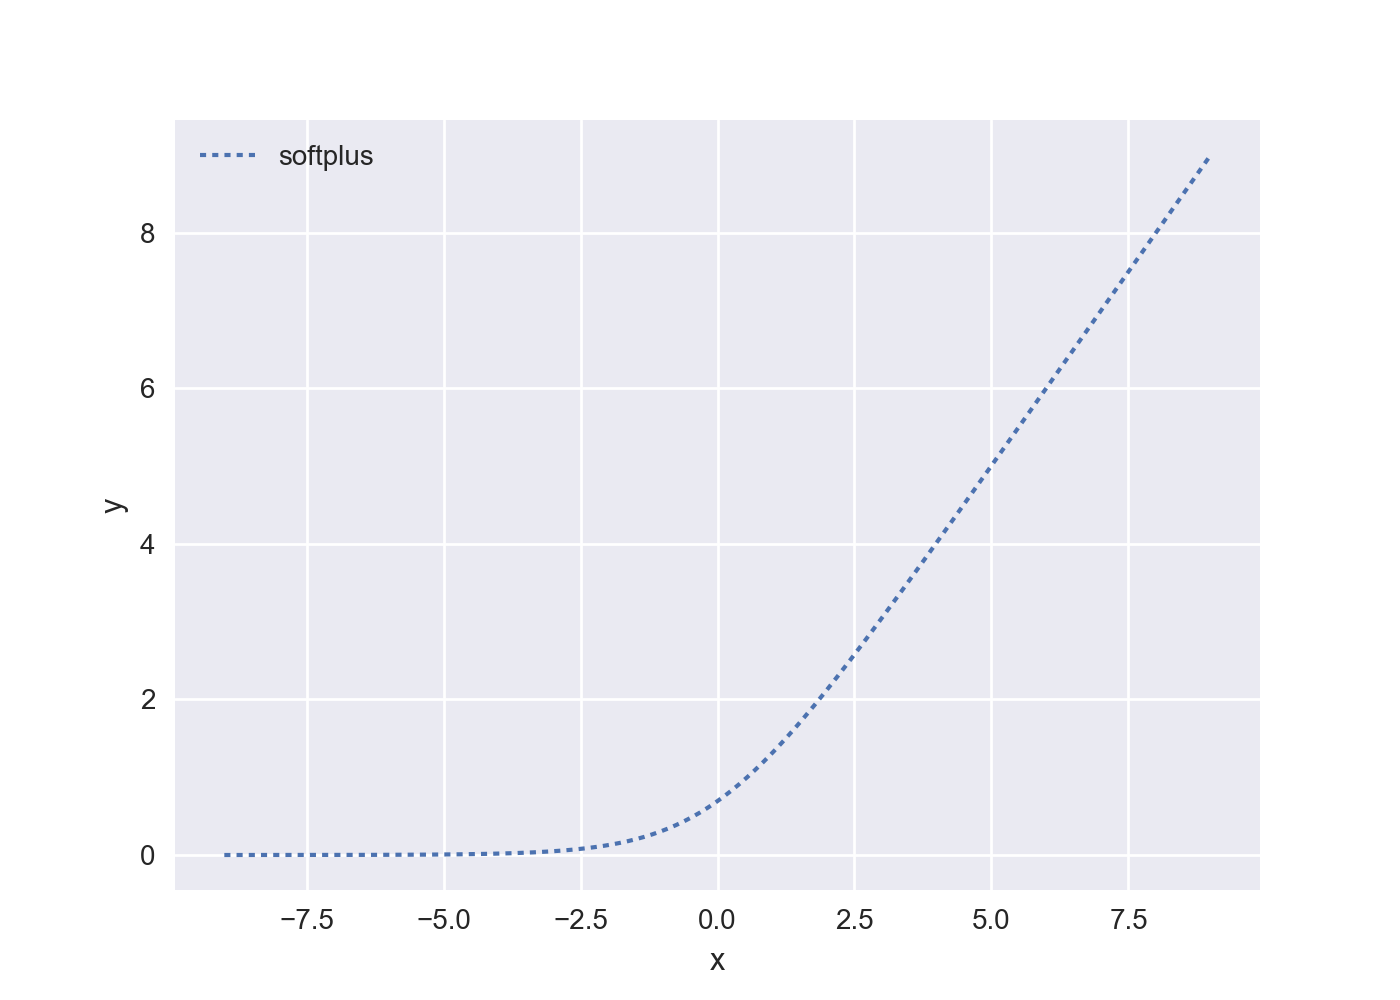

In [22]:
plotFn(tf.nn.softplus)

### Exponential Linear Unit (ELU)

In [23]:
sess.run(tf.nn.elu(features=a))

array([ 1.20000005,  4.80000019,  7.5       , -0.75340301,  0.1       ,
       -0.97527647,  8.30000019, -0.88919687], dtype=float32)

In [24]:
def mapFun(i):
    return tf.cond(tf.less(i, 0), lambda: tf.exp(i) - 1, lambda: i)

elu = tf.map_fn(mapFun, a)
sess.run(elu)

array([ 1.20000005,  4.80000019,  7.5       , -0.75340301,  0.1       ,
       -0.97527647,  8.30000019, -0.88919687], dtype=float32)

<IPython.core.display.Javascript object>


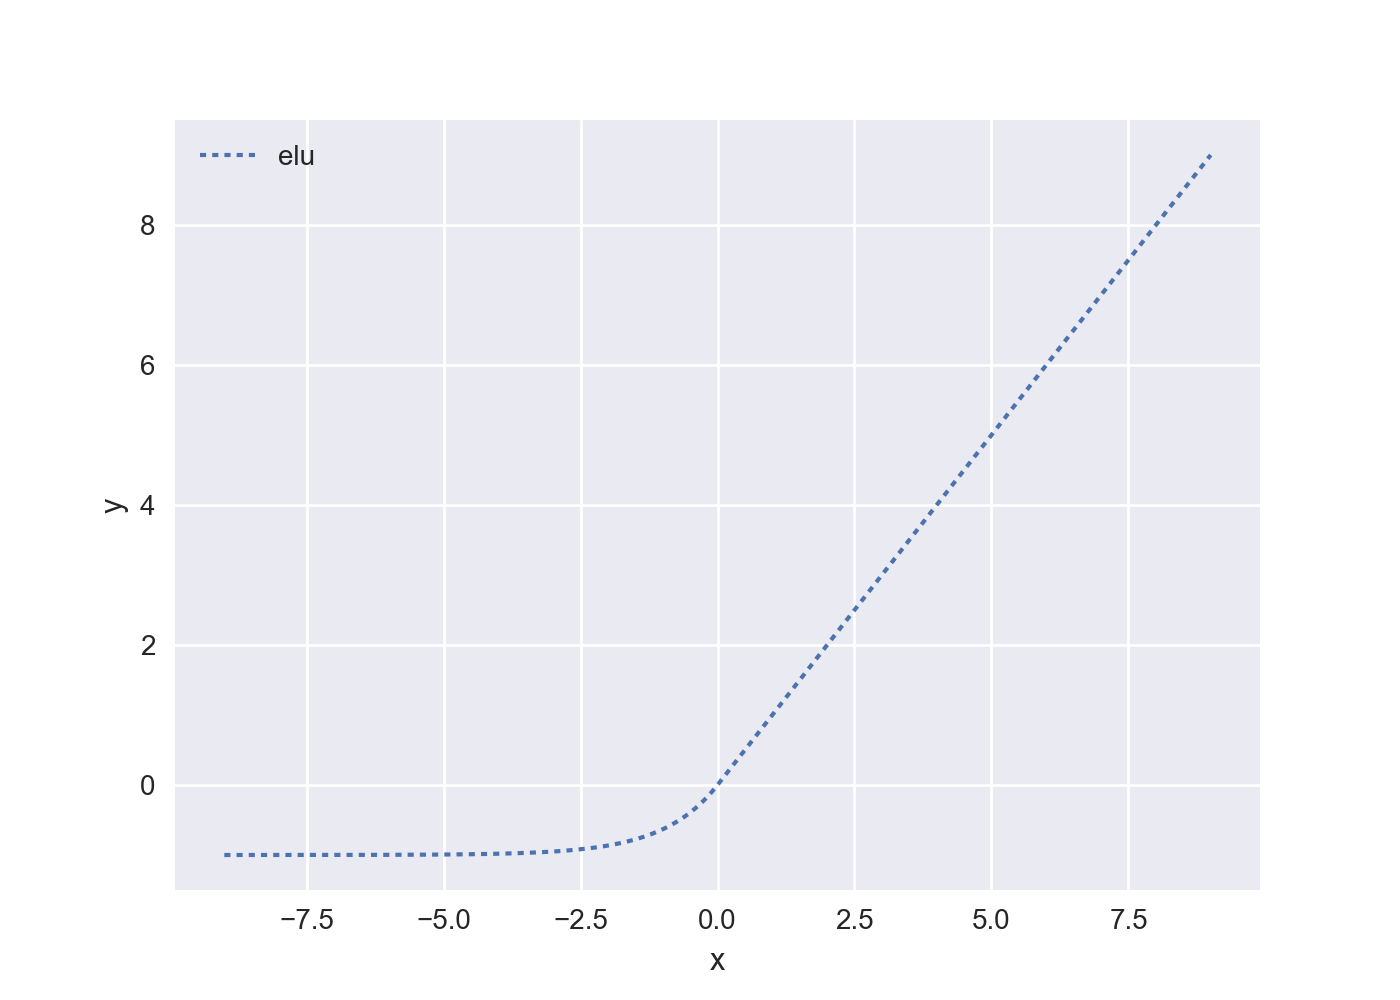

In [25]:
plotFn(tf.nn.elu)

### Activation Functions of Softplus, ReLU, ReLU6, and Exponential LU

<IPython.core.display.Javascript object>


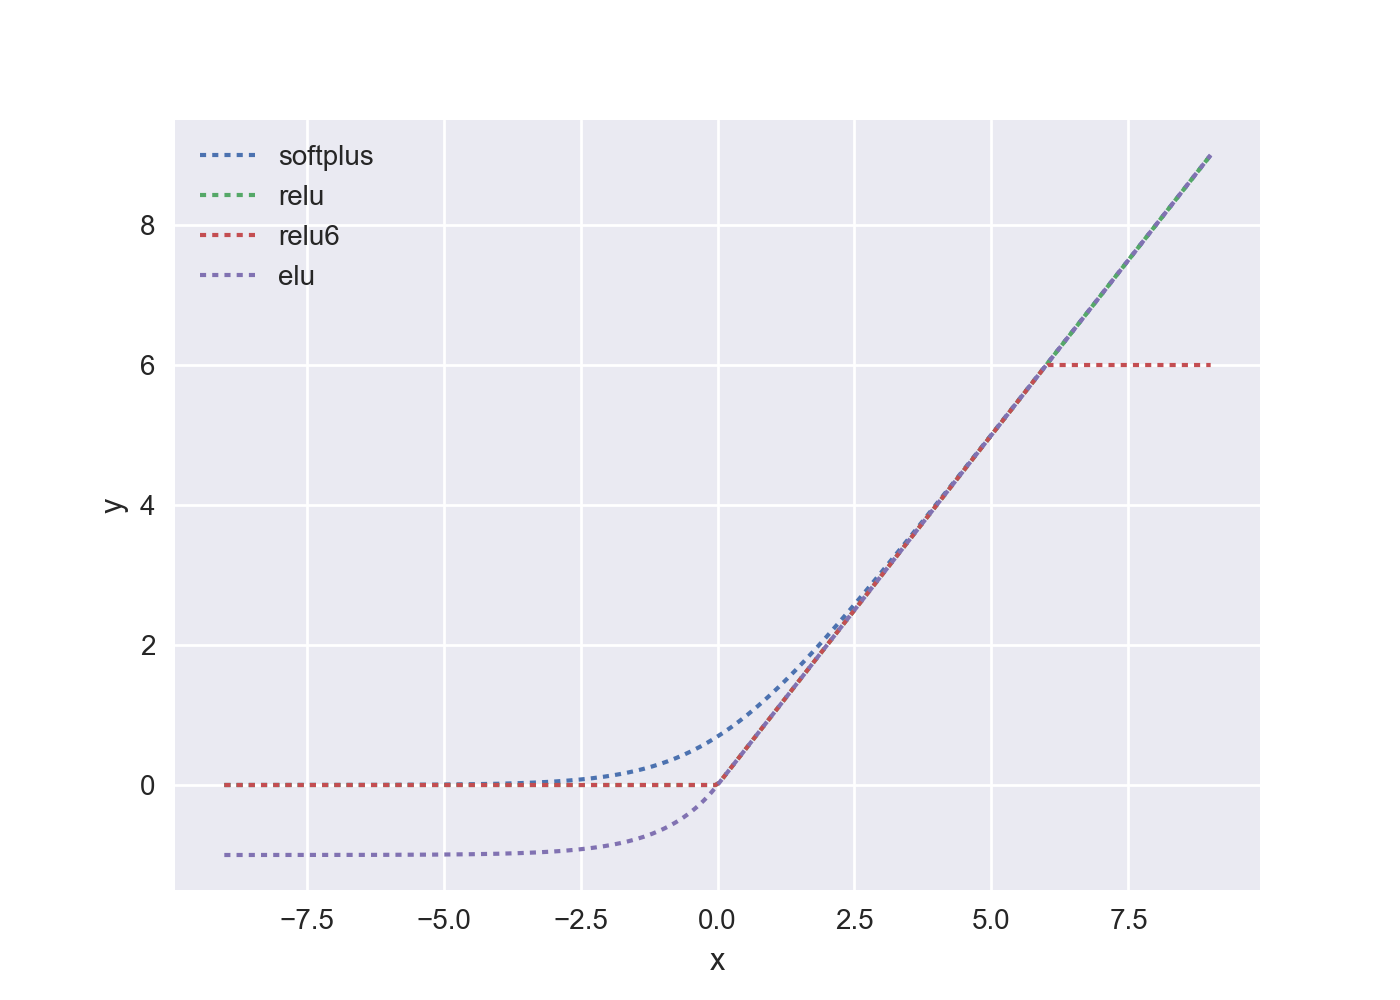

In [26]:
plotFn([tf.nn.softplus, tf.nn.relu, tf.nn.relu6, tf.nn.elu])

### Sigmoid, Hyperbolic Tangent (tanh), and Softsign Activation Function

<IPython.core.display.Javascript object>


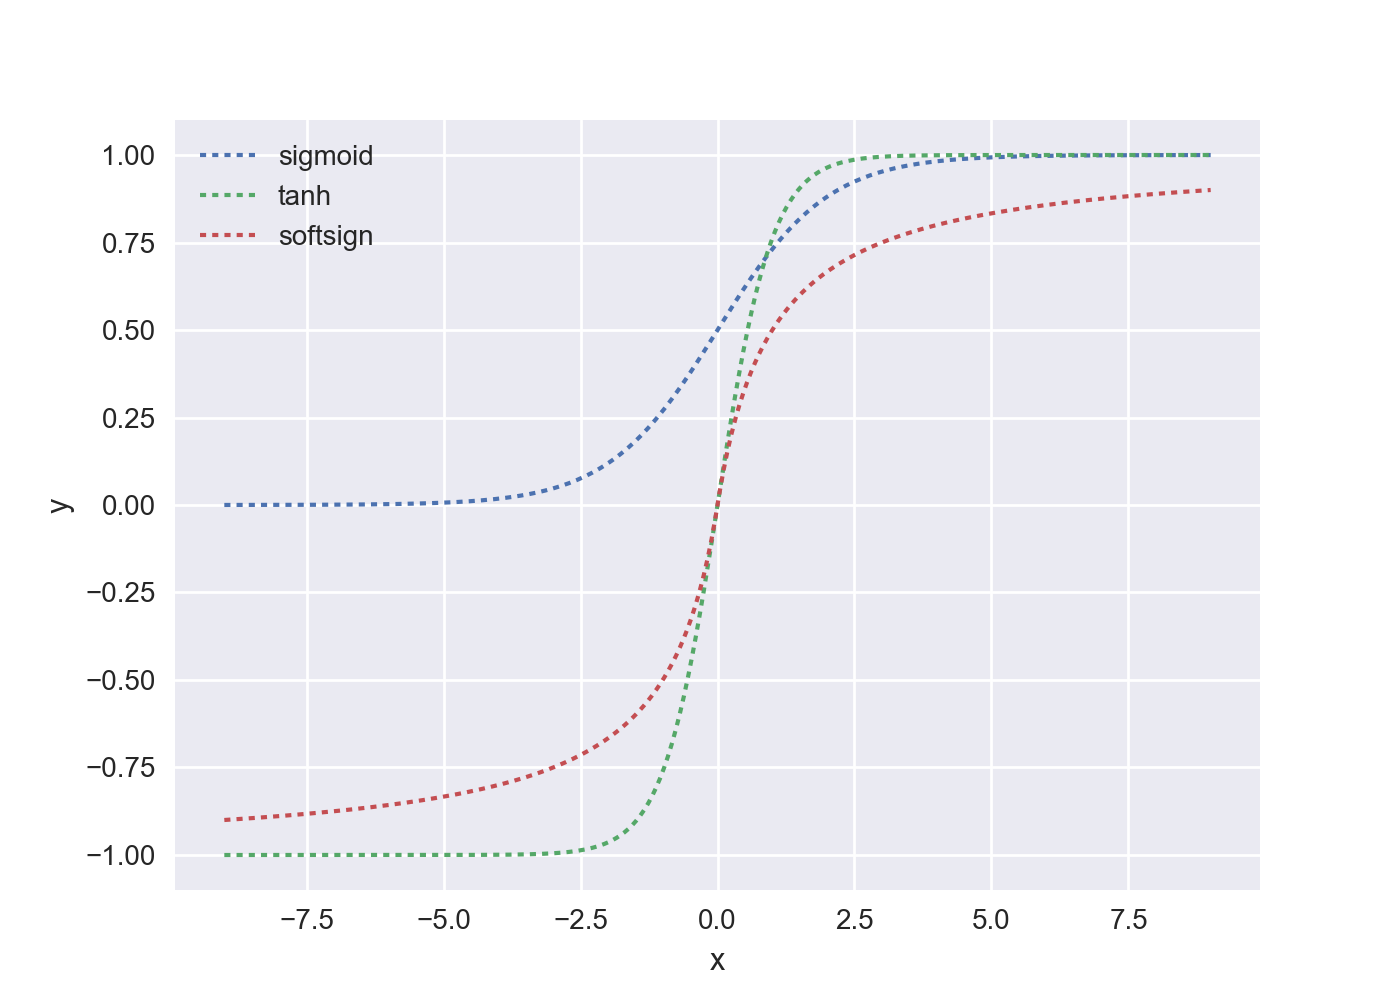

In [27]:
plotFn([tf.nn.sigmoid, tf.nn.tanh, tf.nn.softsign])

### All Activation Functions in One Plot

<IPython.core.display.Javascript object>


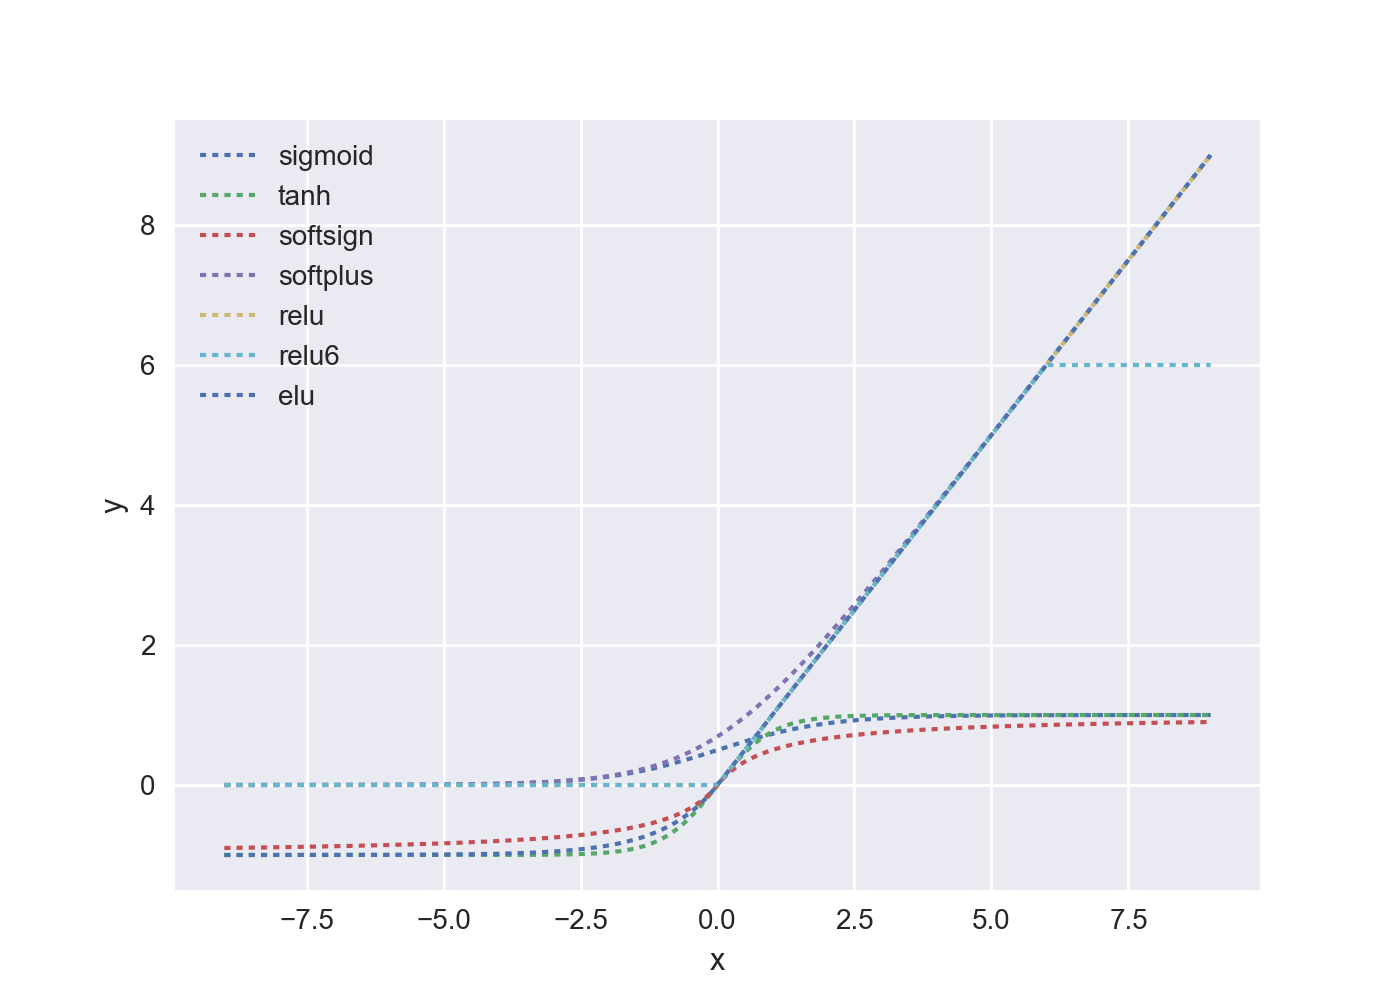

In [28]:
plotFn([tf.nn.sigmoid, tf.nn.tanh, tf.nn.softsign, tf.nn.softplus, tf.nn.relu, tf.nn.relu6, tf.nn.elu], xRange=(-9., 9.))